In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_ad=pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
data_ad.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
#when a user click --> 1 else -->0
#Every user we will display 10 ad
#we will do it to 10000 user
#interactive learning is also called reinforcement learning.
# 

In [7]:
import random

N=10000
d=10
ads_selected=[]
total_reward=0

for n in range(0,N):
    ad=random.randrange(d)
    ads_selected.append(ad)
    reward=data_ad.values[n,ad]
    total_reward=total_reward+reward

In [15]:
#We are creating Random selection without algorithm or another strategy,

In [9]:
ads_selected[0:5]

[5, 4, 4, 3, 6]

In [10]:
total_reward

1174

In [ ]:
#Out of 10000 people only 1174 people has clicked the ad.

Text(0,0.5,'Count')

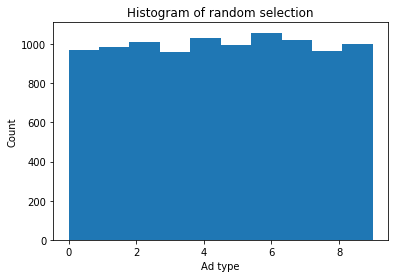

In [12]:
plt.hist(ads_selected)
plt.title('Histogram of random selection')
plt.xlabel('Ad type')
plt.ylabel('Count')

